In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
# Read the CSV file into a pandas DataFrame
successful_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/successful_nondup.csv')
successful_final_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/successful_final.csv', header=0)
successful_df = successful_df[successful_df['project'].isin(successful_final_df['name'])]
path = "/Users/firhard/Desktop/reports-tmp/"
projects = successful_df.iloc[:, 0]

In [3]:
# for project in projects:
#     nonpublictest = project + "_method_visibility_non_public.tsv"
#     test = project + "_method_visibility.tsv"
#     cut = project + "_all_method_visibility.tsv"
#     nonpublictest_file_path = os.path.join(path, nonpublictest)
#     test_file_path = os.path.join(path, test)
#     cut_file_path = os.path.join(path, cut)
    
#     if not os.path.exists(nonpublictest_file_path):
#         print("File does not exist.")
        
#     if not os.path.exists(test_file_path):
#         print("File does not exist.")
    
#     if not os.path.exists(cut_file_path):
#         print("File does not exist.")

In [4]:
file_list = os.listdir(path)
remove_words = ['_all_method_visibility.tsv','_method_visibility.tsv','_method_visibility_non_public.tsv']
files = []
for file in file_list:
    new_text = file
    if remove_words[0] in file:
        new_text = file.replace(remove_words[0], "")
    elif remove_words[1] in file:
        new_text = file.replace(remove_words[1], "")
    elif remove_words[2] in file:
        new_text = file.replace(remove_words[2], "")
    files.append(new_text)
unique_files = set(files)
unique_successful = set(projects)

non_union = unique_successful.difference(unique_files)
print(len(unique_files))
print(len(unique_successful))
# print(non_union)

# for project in unique_successful:
#     reportpath = ['/Users/firhard/Desktop/reports-tmp/' + project + '_all_method_visibility.tsv',
#                   '/Users/firhard/Desktop/reports-tmp/' + project + '_method_visibility.tsv',
#                   '/Users/firhard/Desktop/reports-tmp/' + project + '_method_visibility_non_public.tsv']
#     # print(path)
#     with open(reportpath[0], 'r', newline='') as file:
#         reader = csv.reader(file, delimiter='\t')  # Specify the tab delimiter
#         data = list(reader)  # Read the data from the TSV file into a list of rows
#         print(data)

9607
8958


In [5]:
prj_test_df = pd.read_csv('/Users/firhard/Desktop/reports-tmp/' + 'zzycjcg-foundation' + remove_words[1], sep='\t', header=0)
# print(prj_test_df.groupby(by='visibility').size())

In [6]:
## for creating cut_accessibility.csv

# proj = 'zzycjcg-foundation'
cut_accessibility = []
# print(unique_files.remove('.DS_Store'))

for proj in unique_files:
    prj_cut_df = pd.read_csv('/Users/firhard/Desktop/reports-tmp/' + proj + remove_words[0], sep='\t', header=0)
    # print(prj_cut_df.groupby(by='visibility').size())
    result_df = pd.DataFrame(prj_cut_df.groupby(by='visibility').size(), columns=['count'])
    df_transposed = result_df.transpose()
    # project name
    test_str = proj + ','
    # total
    if 'public' in df_transposed.columns:
        test_str += (str(df_transposed['public']['count']) + ',')
    else:
        test_str += ('0,')
    if 'protected' in df_transposed.columns:
        test_str += (str(df_transposed['protected']['count']) + ',')
    else:
        test_str += ('0,')
    if 'package-private' in df_transposed.columns:
        test_str += (str(df_transposed['package-private']['count']) + ',')
    else:
        test_str += ('0,')
    if 'private' in df_transposed.columns:
        test_str += (str(df_transposed['private']['count']) + ',')
    else:
        test_str += ('0,')

    # percentage
    if 'public' in df_transposed.columns:
        test_str += (str(round(df_transposed['public']['count'] / result_df.sum()['count'],4)) + ',')
    else:
        test_str += ('0,')
    if 'protected' in df_transposed.columns:
        test_str += (str(round(df_transposed['protected']['count'] / result_df.sum()['count'],4)) + ',')
    else:
        test_str += ('0,')
    if 'package-private' in df_transposed.columns:
        test_str += (str(round(df_transposed['package-private']['count'] / result_df.sum()['count'],4)) + ',')
    else:
        test_str += ('0,')
    if 'private' in df_transposed.columns:
        test_str += (str(round(df_transposed['private']['count'] / result_df.sum()['count'],4)))
    else:
        test_str += ('0')
    
    cut_accessibility.append(test_str)

with open('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', 'w') as file:
    # Convert the list elements to strings and write them into the file
    file.write('project,public,protected,private-package,private,public_percent,protected_percent,package-private_percent,private_percent\n')
    file.write('\n'.join(str(element) for element in cut_accessibility))    

In [7]:
## for creating test_accessibility.csv

# proj = 'zzycjcg-foundation'
test_accessibility = []
# print(unique_files.remove('.DS_Store'))

for proj in unique_files:
    if os.path.exists('/Users/firhard/Desktop/reports-tmp/' + proj + remove_words[1]):
        prj_cut_df = pd.read_csv('/Users/firhard/Desktop/reports-tmp/' + proj + remove_words[1], sep='\t', header=0)
        # print(prj_cut_df.groupby(by='visibility').size())
        result_df = pd.DataFrame(prj_cut_df.groupby(by='visibility').size(), columns=['count'])
        df_transposed = result_df.transpose()
        # project name
        test_str = proj + ','
        # total
        if 'public' in df_transposed.columns:
            test_str += (str(df_transposed['public']['count']) + ',')
        else:
            test_str += ('0,')
        if 'protected' in df_transposed.columns:
            test_str += (str(df_transposed['protected']['count']) + ',')
        else:
            test_str += ('0,')
        if 'package-private' in df_transposed.columns:
            test_str += (str(df_transposed['package-private']['count']) + ',')
        else:
            test_str += ('0,')
        if 'private' in df_transposed.columns:
            test_str += (str(df_transposed['private']['count']) + ',')
        else:
            test_str += ('0,')

        # percentage
        if 'public' in df_transposed.columns:
            test_str += (str(round(df_transposed['public']['count'] / result_df.sum()['count'],4)) + ',')
        else:
            test_str += ('0,')
        if 'protected' in df_transposed.columns:
            test_str += (str(round(df_transposed['protected']['count'] / result_df.sum()['count'],4)) + ',')
        else:
            test_str += ('0,')
        if 'package-private' in df_transposed.columns:
            test_str += (str(round(df_transposed['package-private']['count'] / result_df.sum()['count'],4)) + ',')
        else:
            test_str += ('0,')
        if 'private' in df_transposed.columns:
            test_str += (str(round(df_transposed['private']['count'] / result_df.sum()['count'],4)))
        else:
            test_str += ('0')

        test_accessibility.append(test_str)

with open('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', 'w') as file:
    # Convert the list elements to strings and write them into the file
    file.write('project,public,protected,private-package,private,public_percent,protected_percent,package-private_percent,private_percent\n')
    file.write('\n'.join(str(element) for element in test_accessibility))

In [8]:
tests = []

for proj in unique_files:
    if os.path.exists('/Users/firhard/Desktop/reports-tmp/' + proj + remove_words[1]):
        prj_cut_df = pd.read_csv('/Users/firhard/Desktop/reports-tmp/' + proj + remove_words[1], sep='\t', header=0)
        # print(prj_cut_df.groupby(by='visibility').size())
        result_df = pd.DataFrame(prj_cut_df.groupby(by='test').size(), columns=['count'])
        test_str = proj + ',' + str(len(result_df))
        tests.append(test_str)
with open('/Users/firhard/Desktop/test-visibility-checker/tests_per_project.csv', 'w') as file:
    # Convert the list elements to strings and write them into the file
    file.write('project,num_of_tests\n')
    file.write('\n'.join(str(element) for element in tests))

# After cleaning the data

In [40]:
successful_final_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/successful_final.csv', header=0)
print(len(successful_final_df))

8958


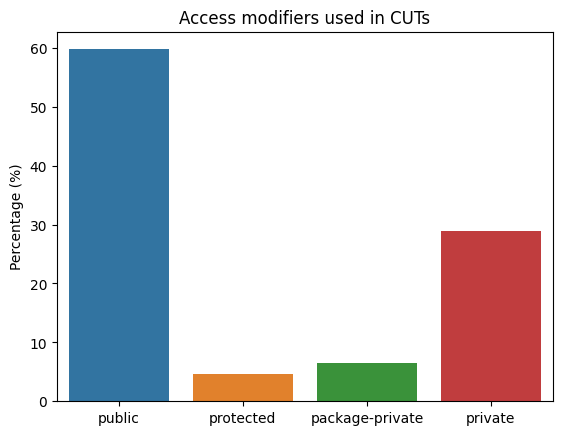

Total number of projects: 8958
public_percent             59.771124
protected_percent           4.702294
package-private_percent     6.560125
private_percent            28.966352
dtype: float64
public             4868039
protected           413830
private-package     551133
private            1717584
dtype: int64


In [49]:
cut_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', header=0)
cut_df = cut_df[cut_df['project'].isin(successful_final_df['name'])]
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

# Calculate the mean of each column in the DataFrame
mean_values = cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in CUTs')

# Show the histogram
plt.show()
print("Total number of projects: " + str(len(cut_df)))
print(cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(cut_df[['public', 'protected', 'private-package', 'private']].sum())


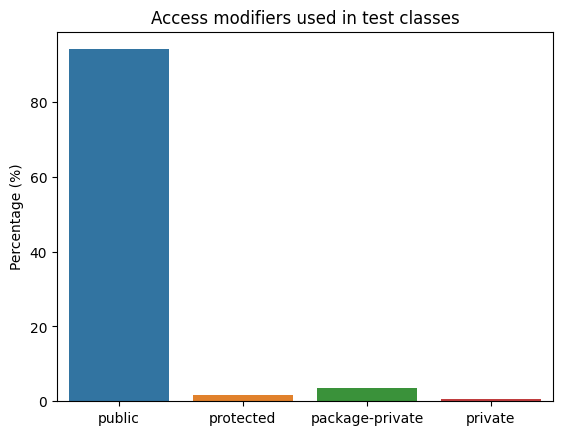

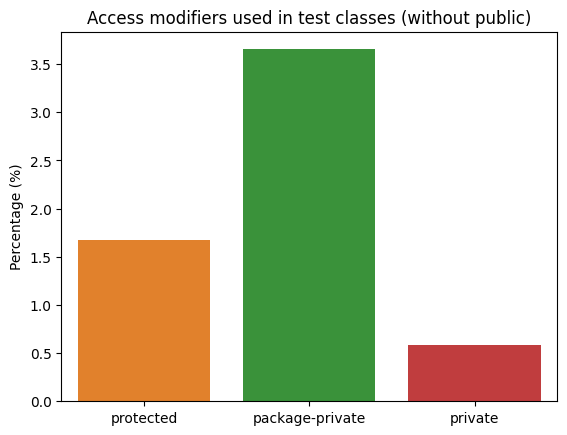

public_percent             94.083207
protected_percent           1.670641
package-private_percent     3.653315
private_percent             0.588583
dtype: float64
public             737498
protected            7723
private-package     19038
private              1330
dtype: int64


In [50]:
test_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', header=0)
test_df = test_df[test_df['project'].isin(successful_final_df['name'])]
# print(test_df[test_df['public_percent'] == 0, test_df['protected_percent'] == 0])
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

ax = sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes')

# Convert y-axis values to logarithmic percentage
# ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set the y-axis to a logarithmic scale
# ax.set_yscale('log')

# Show the histogram
plt.show()

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df, palette=sns.color_palette().as_hex()[1:])

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes (without public)')

# Show the histogram
plt.show()
print(test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(test_df[['public', 'protected', 'private-package', 'private']].sum())

In [12]:
# # print(test_df['project'])
# java_projects = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/java_projects.csv', header=0)
# # print(java_projects['name'])
# filtered_df = java_projects[java_projects['name'].isin(test_df['project'])]
# print(len(filtered_df))
# filtered_df.to_csv('successful_final.csv', index=False)

In [17]:
# tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project.csv', header=0)
# tpp_df = tpp_df[tpp_df['project'].isin(successful_final_df['name'])]
# tpp_df.to_csv('tests_per_project_final.csv', index=False)

                                    project  num_of_tests
0     MarketSquare-robotframework-dblibrary            21
1               xseris-JavaCryptoAlgorithms            23
2                         krdev-pop3sclient             4
3                 itsallbinary-simply-regex             4
4                       bordertech-mrz-java            54
...                                     ...           ...
9326                    agapsys-smtp-sender            18
9327  tokenopoly-coinbase-commerce-core-jpa             9
9328        Orange-OpenSource-trail-drawing            74
9329              rtyley-roboguice-sherlock             7
9330     googleapis-java-bigqueryconnection           126

[8958 rows x 2 columns]


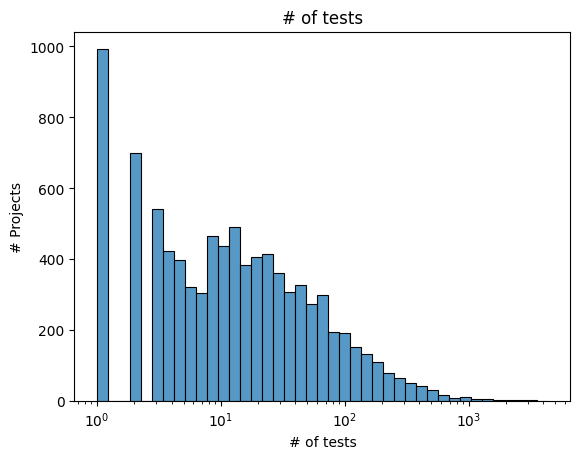

41.77450323732976
11.0
374216


In [47]:
tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project_final.csv', header=0)
ax = sns.histplot(data=tpp_df, x='num_of_tests',log_scale=True)


# Set labels and title
plt.xlabel('# of tests')
plt.ylabel('# Projects')
plt.title('# of tests')


# Show the histogram
plt.show()

print(tpp_df['num_of_tests'].mean())
print(tpp_df['num_of_tests'].median())
print(tpp_df['num_of_tests'].sum())

# Only Apache Commons Project

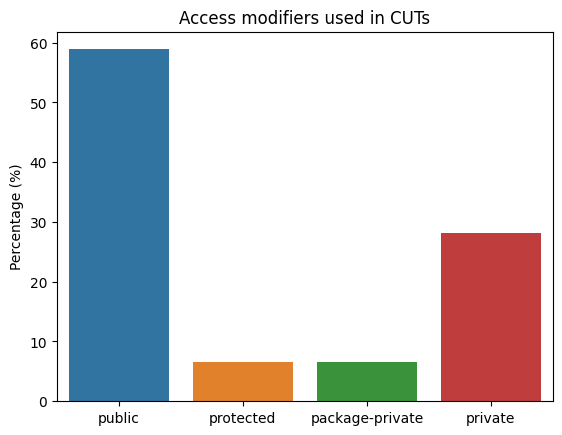

Total number of projects: 31
public_percent             58.876452
protected_percent           6.535161
package-private_percent     6.507419
private_percent            28.081935
dtype: float64
public             44745
protected           4523
private-package     4363
private            19556
dtype: int64


In [52]:
cut_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', header=0)
cut_df = cut_df[cut_df['project'].isin(successful_final_df['name'])]
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

cut_df = cut_df[cut_df['project'].str.startswith('apache-commons')]

# Calculate the mean of each column in the DataFrame
mean_values = cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df)

# # Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in Apache-Commons Projects')

# # Show the histogram
plt.show()
print("Total number of projects: " + str(len(cut_df)))
print(cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(cut_df[['public', 'protected', 'private-package', 'private']].sum())

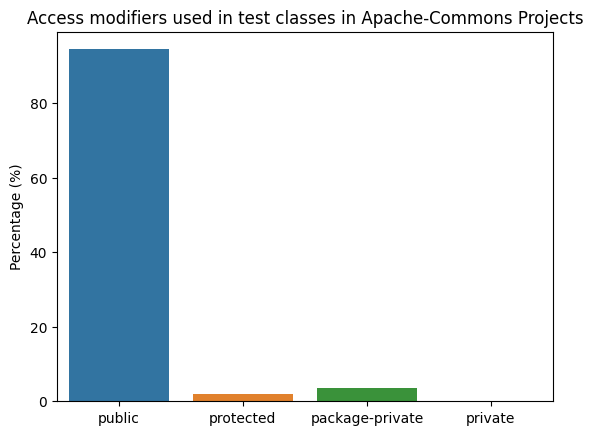

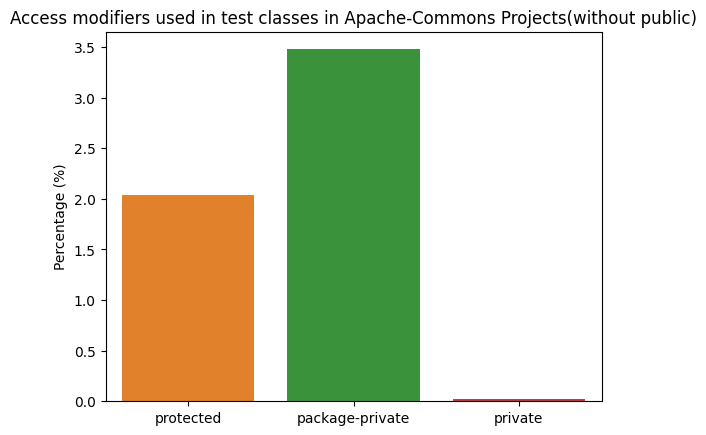

public_percent             94.463226
protected_percent           2.039355
package-private_percent     3.478387
private_percent             0.018387
dtype: float64
public             29812
protected            481
private-package      994
private               26
dtype: int64


In [54]:
test_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', header=0)
test_df = test_df[test_df['project'].isin(successful_final_df['name'])]
# print(test_df[test_df['public_percent'] == 0, test_df['protected_percent'] == 0])
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

test_df = test_df[test_df['project'].str.startswith('apache-commons')]
# Calculate the mean of each column in the DataFrame
mean_values = test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

ax = sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes in Apache-Commons Projects')

# Convert y-axis values to logarithmic percentage
# ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set the y-axis to a logarithmic scale
# ax.set_yscale('log')

# Show the histogram
plt.show()

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df, palette=sns.color_palette().as_hex()[1:])

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes in Apache-Commons Projects(without public)')

# Show the histogram
plt.show()
print(test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(test_df[['public', 'protected', 'private-package', 'private']].sum())